Welcome to this notebook. In this notebook some simple regression algorithms are demonstrated.<br>
Written by Bart Bozon, please copy & use as you would like.

# First simple attempt (mainly to show the graph in the sheets) #

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/Fish.csv'
#
# origin: https://documentation.sas.com/doc/en/statug/15.2/statug_sashelp_sect012.htm
# For each of the seven species (bream, roach, whitefish, parkki, perch, pike, and smelt),
# the weight, length, height, and width of each fish are tallied.
# Three different length measurements are recorded: from the nose of the fish to the beginning
# of its tail, from the nose to the notch of its tail, and from the nose to the end of its tail.
#
df = pd.read_csv(url)
df.head()
df.drop('Category',axis=1,inplace=True)
df.drop('Species',axis=1,inplace=True)


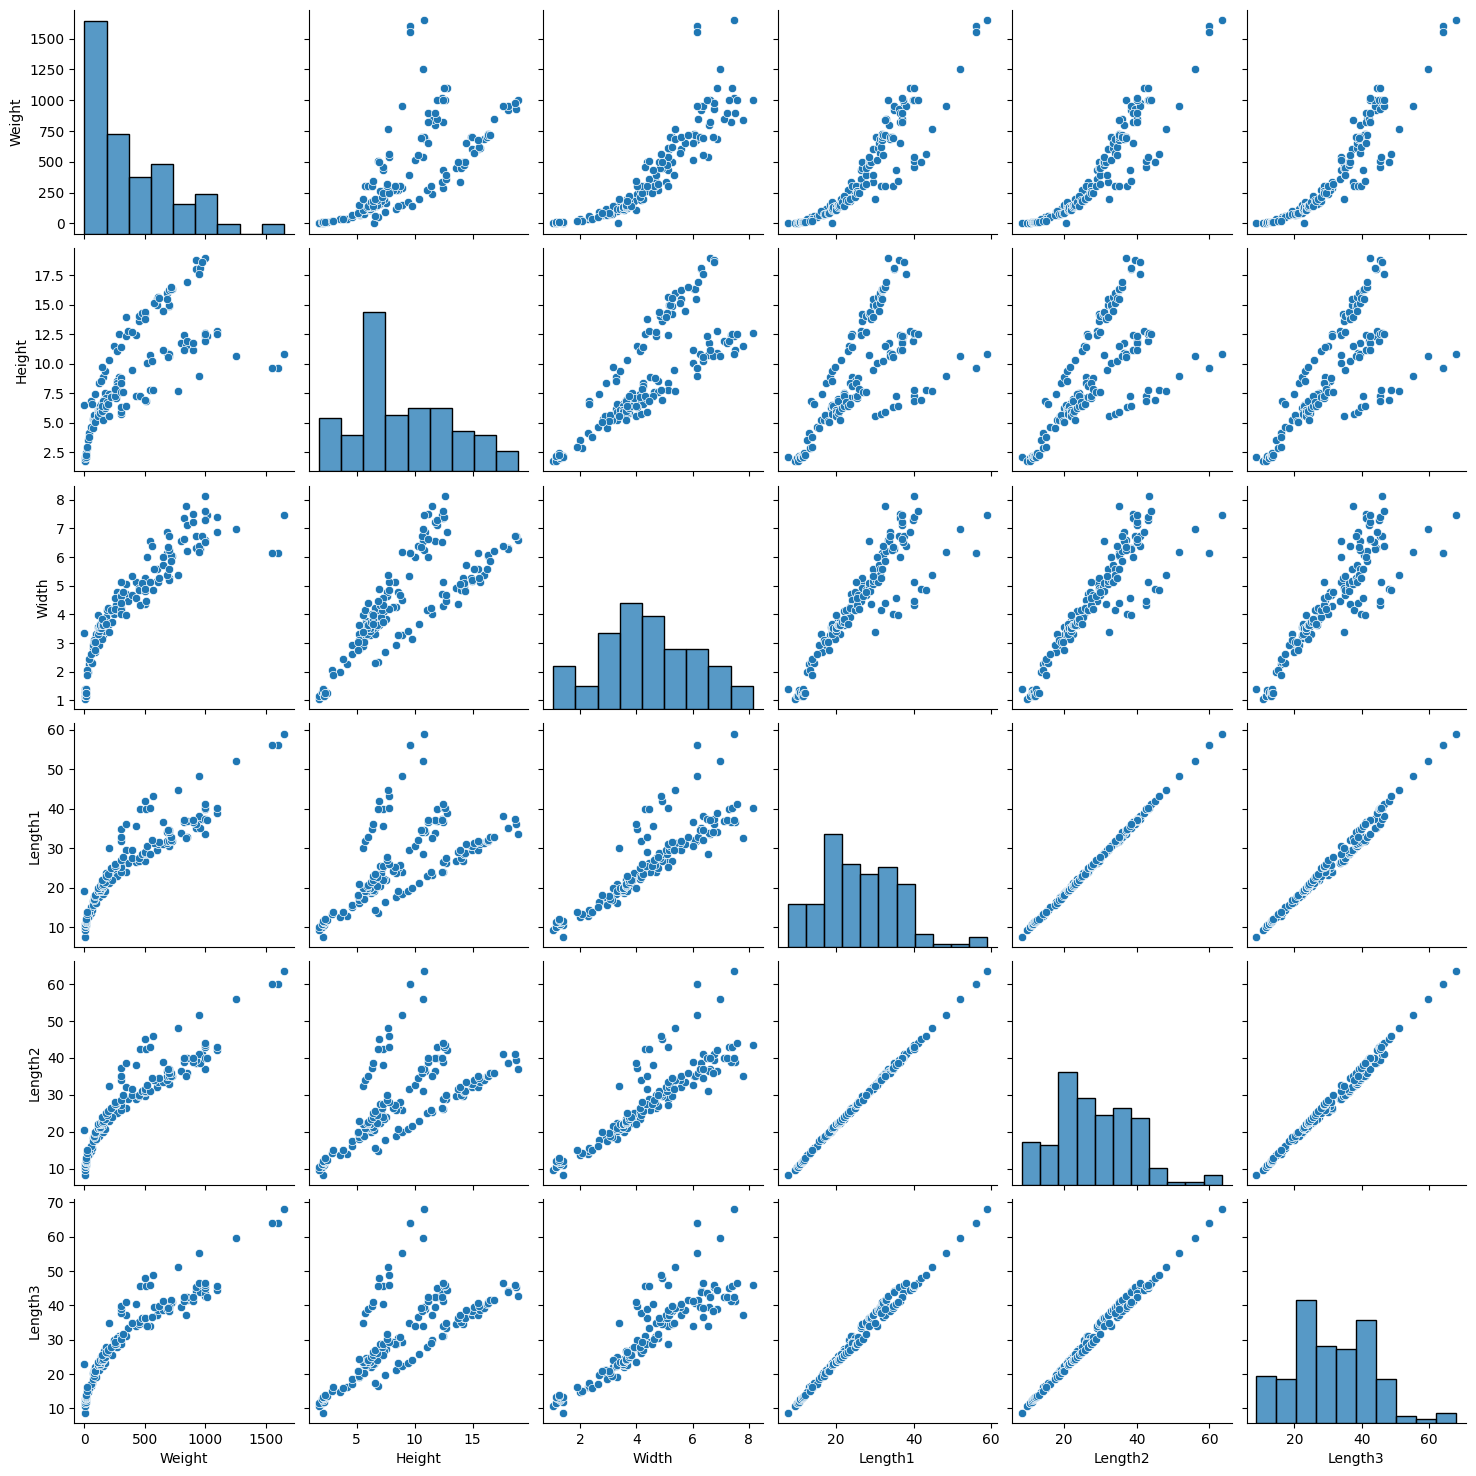

In [ ]:
import seaborn as sns
sns.pairplot(df)

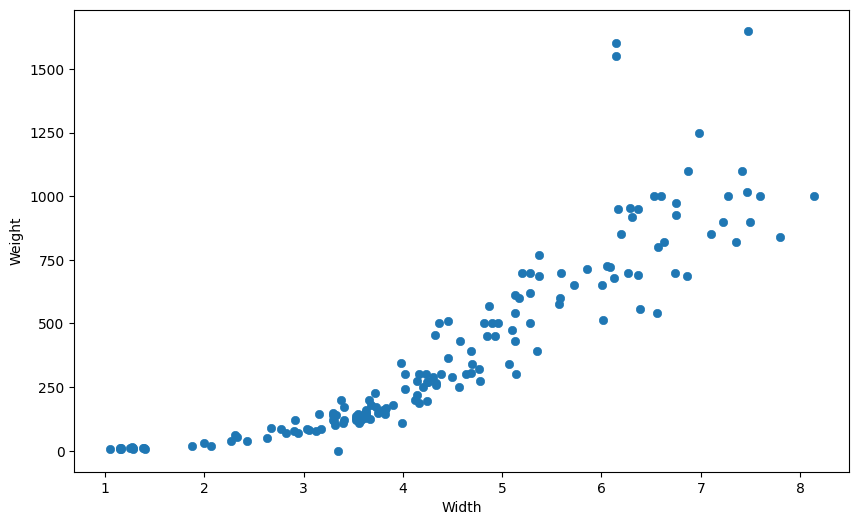

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Width', y='Weight', data=df, ec=None)
plt.show()

In [ ]:
X=df.drop(['Length1','Weight','Height','Length2','Length3'],axis=1)
y=df['Weight']                                                                 # we want to predict the weight of the fish
print (X.head())
print (y.head())
from sklearn.model_selection import train_test_split
# we always want to work with a training, validation and test data set
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)
print (X_train.shape)
print (X_validation.shape)
print (X_test.shape)

    Width
0  4.0200
1  4.3056
2  4.6961
3  4.4555
4  5.1340
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64
(127, 1)
(16, 1)
(16, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

-450.18925256413195
[188.94733759]


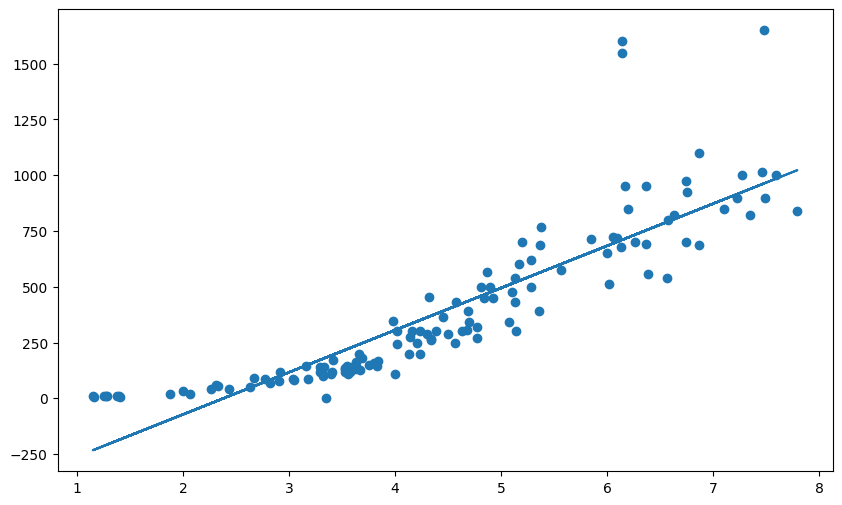

In [ ]:
#For linear regression you can also ask for the resulting parameters
print(model.intercept_)
print(model.coef_)

pred = model.predict(X_train)           # Please note, this is strange, you normally would always do it on the validation set, but I want to draw a line to all data points. Easiest way to do it
# End Strangeness... :-)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training data')
plt.plot(X_train, pred)
plt.show()

In [ ]:
pred = model.predict(X_validation)

from sklearn import metrics
print('MAE is  : ',metrics.mean_absolute_error(y_validation, pred))
print('MSE is  : ',metrics.mean_squared_error(y_validation, pred))
print('RMSE is : ',np.sqrt(metrics.mean_squared_error(y_validation, pred)))
print('R2 is   :',(metrics.r2_score(y_validation, pred)))


MAE is  :  139.97987669670476
MSE is  :  28753.529949167143
RMSE is :  169.56865851084376
R2 is   : 0.8321171797875898


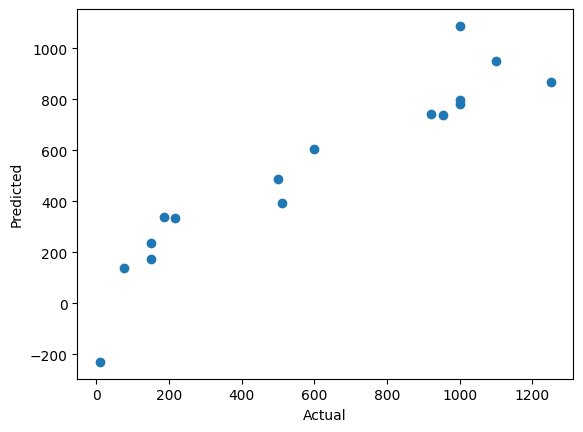

In [ ]:
plt.scatter(y_validation, pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

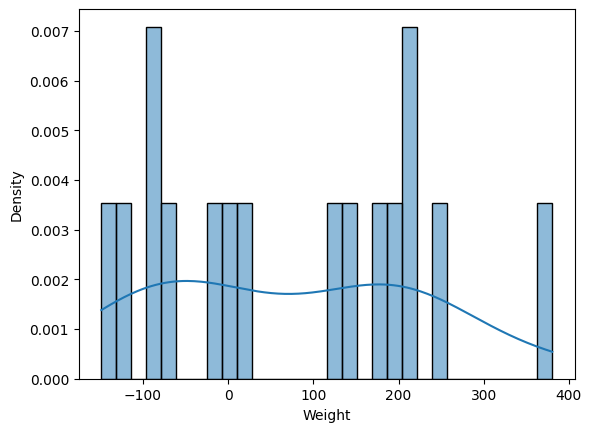

In [ ]:
import seaborn as sns
sns.histplot(y_validation - pred, kde=True, stat="density", bins=30)

# How to include categorical features #

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/Fish.csv'
df = pd.read_csv(url)
df

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...,...,...
154,6,Smelt,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,Smelt,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,Smelt,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2


***Do NOT use the category numerical value!!! If you do this it implies that there is a value associated with the category value. So Bream is "less" than Spelt.*** <br>
 This is obviously nonsense... So we drop it...

In [ ]:
df.drop('Category',axis=1,inplace=True)

We will use pd.get_dummies to use the species feature.

In [ ]:
df=pd.get_dummies(df, columns=['Species'], drop_first=True)
df.head()

,Weight,Height,Width,Length1,Length2,Length3,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,11.5200,4.0200,23.2,25.4,30.0,False,False,False,False,False,False
1,290.0,12.4800,4.3056,24.0,26.3,31.2,False,False,False,False,False,False
2,340.0,12.3778,4.6961,23.9,26.5,31.1,False,False,False,False,False,False
3,363.0,12.7300,4.4555,26.3,29.0,33.5,False,False,False,False,False,False
4,430.0,12.4440,5.1340,26.5,29.0,34.0,False,False,False,False,False,False


In [ ]:
X=df.drop(['Length1','Weight','Height','Length2','Length3'],axis=1)
y=df['Weight']                                                                 # we want to predict the weight of the fish
from sklearn.model_selection import train_test_split
# we always want to work with a training, validation and test data set
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_validation)
from sklearn import metrics
print('MAE is  : ',metrics.mean_absolute_error(y_validation, pred))
print('MSE is  : ',metrics.mean_squared_error(y_validation, pred))
print('RMSE is : ',np.sqrt(metrics.mean_squared_error(y_validation, pred)))
print('R2 is   :',(metrics.r2_score(y_validation, pred)))


MAE is  :  96.42920202123528
MSE is  :  16605.12993957752
RMSE is :  128.8608937559317
R2 is   : 0.9030478675425885


Better than our previous attempt!

# Polynominal regression #

We prepare the data as normal.

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/Fish.csv'
df = pd.read_csv(url)
df.drop('Category',axis=1,inplace=True)
df.drop('Species',axis=1,inplace=True)
X=df.drop(['Length1','Weight','Height','Length2','Length3'],axis=1)
y=df['Weight']                                                                 # we want to predict the weight of the fish

We transform the data to $x^2$ using polynominal features

In [ ]:
print ('The data before the transform:')
print (X)

from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)
X = polynomial_features.fit_transform(X)

print ('The data after the transform:')
print (X)

The data before the transform:
      Width
0    4.0200
1    4.3056
2    4.6961
3    4.4555
4    5.1340
..      ...
154  1.3936
155  1.2690
156  1.2558
157  2.0672
158  1.8792

[159 rows x 1 columns]
The data after the transform:
[[ 1.          4.02       16.1604    ]
 [ 1.          4.3056     18.53819136]
 [ 1.          4.6961     22.05335521]
 [ 1.          4.4555     19.85148025]
 [ 1.          5.134      26.357956  ]
 [ 1.          4.9274     24.27927076]
 [ 1.          5.2785     27.86256225]
 [ 1.          4.69       21.9961    ]
 [ 1.          4.8438     23.46239844]
 [ 1.          4.9594     24.59564836]
 [ 1.          5.1042     26.05285764]
 [ 1.          4.8146     23.18037316]
 [ 1.          4.368      19.079424  ]
 [ 1.          5.0728     25.73329984]
 [ 1.          5.1708     26.73717264]
 [ 1.          5.58       31.1364    ]
 [ 1.          5.2854     27.93545316]
 [ 1.          5.1975     27.01400625]
 [ 1.          5.1338     26.35590244]
 [ 1.          5.7276     32.8

In [ ]:
from sklearn.model_selection import train_test_split
# we always want to work with a training, validation and test data set
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_validation)
from sklearn import metrics
print('MAE is  : ',metrics.mean_absolute_error(y_validation, pred))
print('MSE is  : ',metrics.mean_squared_error(y_validation, pred))
print('RMSE is : ',np.sqrt(metrics.mean_squared_error(y_validation, pred)))
print('R2 is   :',(metrics.r2_score(y_validation, pred)))

MAE is  :  120.5380319296128
MSE is  :  23674.116746924898
RMSE is :  153.86395532068224
R2 is   : 0.8617742763223155


It worked! Slightly better results than the first attempt.

Let's try with a polynomial of the third degree ($ax+bx^2+cx^3$+d)

In [ ]:
X=df.drop(['Length1','Weight','Height','Length2','Length3'],axis=1)
y=df['Weight']                                                                 # we want to predict the weight of the fish
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=3)
X = polynomial_features.fit_transform(X)
from sklearn.model_selection import train_test_split
# we always want to work with a training, validation and test data set
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_validation)
from sklearn import metrics
print('MAE is  : ',metrics.mean_absolute_error(y_validation, pred))
print('MSE is  : ',metrics.mean_squared_error(y_validation, pred))
print('RMSE is : ',np.sqrt(metrics.mean_squared_error(y_validation, pred)))
print('R2 is   :',(metrics.r2_score(y_validation, pred)))

MAE is  :  93.68626260144329
MSE is  :  14512.73735166001
RMSE is :  120.46882315213347
R2 is   : 0.9152646899387308


4th?

In [ ]:
X=df.drop(['Length1','Weight','Height','Length2','Length3'],axis=1)
y=df['Weight']                                                                 # we want to predict the weight of the fish
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=4)
X = polynomial_features.fit_transform(X)
from sklearn.model_selection import train_test_split
# we always want to work with a training, validation and test data set
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_validation)
from sklearn import metrics
print('MAE is  : ',metrics.mean_absolute_error(y_validation, pred))
print('MSE is  : ',metrics.mean_squared_error(y_validation, pred))
print('RMSE is : ',np.sqrt(metrics.mean_squared_error(y_validation, pred)))
print('R2 is   :',(metrics.r2_score(y_validation, pred)))

MAE is  :  86.70267042154599
MSE is  :  12835.480666329924
RMSE is :  113.29378035148233
R2 is   : 0.9250576643335664


5th?

In [ ]:
X=df.drop(['Length1','Weight','Height','Length2','Length3'],axis=1)
y=df['Weight']                                                                 # we want to predict the weight of the fish
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=5)
X = polynomial_features.fit_transform(X)
from sklearn.model_selection import train_test_split
# we always want to work with a training, validation and test data set
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_validation)
from sklearn import metrics
print('MAE is  : ',metrics.mean_absolute_error(y_validation, pred))
print('MSE is  : ',metrics.mean_squared_error(y_validation, pred))
print('RMSE is : ',np.sqrt(metrics.mean_squared_error(y_validation, pred)))
print('R2 is   :',(metrics.r2_score(y_validation, pred)))

MAE is  :  85.48839487590001
MSE is  :  13230.909745376392
RMSE is :  115.02569167527919
R2 is   : 0.9227488782783698


Why is it worse? <br>
Overfitting!!!

# Multi dimensional polynomial regression #

In [ ]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/Fish.csv'
df = pd.read_csv(url)
df.drop('Category',axis=1,inplace=True)
df.drop('Species',axis=1,inplace=True)
X=df.drop(['Weight'],axis=1)                                                   # Now we use all the data!!!
y=df['Weight']                                                                 # we want to predict the weight of the fish
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)
X = polynomial_features.fit_transform(X)
from sklearn.model_selection import train_test_split
# we always want to work with a training, validation and test data set
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_validation)
from sklearn import metrics
print('MAE is  : ',metrics.mean_absolute_error(y_validation, pred))
print('MSE is  : ',metrics.mean_squared_error(y_validation, pred))
print('RMSE is : ',np.sqrt(metrics.mean_squared_error(y_validation, pred)))
print('R2 is   :',(metrics.r2_score(y_validation, pred)))

MAE is  :  65.45235810225469
MSE is  :  7638.390528285886
RMSE is :  87.3978862918657
R2 is   : 0.9554018394945091


# Combining categorical features and polynominal regression #

In [ ]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/Fish.csv'
df = pd.read_csv(url)
df.drop('Category',axis=1,inplace=True)
df=pd.get_dummies(df, columns=['Species'], drop_first=True)
X=df.drop(['Length1','Weight','Height','Length2','Length3'],axis=1)
y=df['Weight']                                                                 # we want to predict the weight of the fish
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)
X = polynomial_features.fit_transform(X)
from sklearn.model_selection import train_test_split
# we always want to work with a training, validation and test data set
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_validation)
from sklearn import metrics
print('MAE is  : ',metrics.mean_absolute_error(y_validation, pred))
print('MSE is  : ',metrics.mean_squared_error(y_validation, pred))
print('RMSE is : ',np.sqrt(metrics.mean_squared_error(y_validation, pred)))
print('R2 is   :',(metrics.r2_score(y_validation, pred)))

MAE is  :  92.51128293126354
MSE is  :  20167.028099103263
RMSE is :  142.0106619205166
R2 is   : 0.8822510641800887


# Random forest regression #



In [ ]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/Fish.csv'
df = pd.read_csv(url)
df.drop('Category',axis=1,inplace=True)
df.drop('Species',axis=1,inplace=True)
X=df.drop(['Weight'],axis=1)                                                   # Now we use all the data!!!
y=df['Weight']                                                                 # we want to predict the weight of the fish

from sklearn.model_selection import train_test_split
# we always want to work with a training, validation and test data set
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

pred = model.predict(X_validation)
from sklearn import metrics
print('MAE is  : ',metrics.mean_absolute_error(y_validation, pred))
print('MSE is  : ',metrics.mean_squared_error(y_validation, pred))
print('RMSE is : ',np.sqrt(metrics.mean_squared_error(y_validation, pred)))
print('R2 is   :',(metrics.r2_score(y_validation, pred)))

MAE is  :  52.238050595238064
MSE is  :  4690.233383719523
RMSE is :  68.4852785912383
R2 is   : 0.9726152020532687
